<a href="https://colab.research.google.com/github/Khalil1232/Machine-Learning-ULaval/blob/main/Kernel_discriminant_and_gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Devoir 3, Question 3 : Discriminant avec noyau et descente du gradient

# Homework 3, Question 3: Kernel discriminant and gradient descent

## Code préambule

## Preamble code

In [ ]:
import time
import numpy
import itertools
import pandas
pandas.set_option('display.max_colwidth', 0)
import collections

from IPython import display

# Nous ne voulons pas être signalé par ce type d'avertissement, non pertinent pour le devoir
# We don't want to be signaled of this warning, irrelevant for the homework
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

from scipy.optimize import fmin_l_bfgs_b
from scipy.spatial.distance import cdist
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from matplotlib import pyplot

# Fonction pour vérifier le temps d'exécution
# Function to verify execution time
_times = []
def checkTime(maxduration, question):
    duration = _times[-1] - _times[-2]
    if duration > maxduration:
        print("[ATTENTION] Votre code pour la question {0} met trop de temps à s'exécuter! ".format(question)+
              "Le temps maximum permis est de {0:.4f} secondes, ".format(maxduration)+
              "mais votre code a requis {0:.4f} secondes! ".format(duration)+
              "Assurez-vous que vous ne faites pas d'appels bloquants (par exemple à show()) dans cette boucle!")

# Définition des durées d'exécution maximales pour chaque classifieur
# Definition of maximum execution time for each classifier
TMAX_EVAL = 3.0
TMAX_FIT = 2.0

Soit un discriminant avec noyau gaussien, entraîné par descente du gradient avec la fonction
d’erreur suivante :
$$E(\mathbf{\alpha},w_0|\mathcal{X})=\sum_{\mathbf{x}^{t}\in\mathcal{Y}} \left[1-r^{t}\mathrm{h}(\mathbf{x}^{t}|\alpha,w_{0})\right]+\lambda\sum_{t=1}^N\alpha^{t},$$
avec :
$$\mathrm{h}(\mathbf{x}^{t}|\mathbf{\alpha},w_{0})=\sum_{\mathbf{x}^{s}\in\mathcal{X}}{\alpha^{s}r^{s}}K(\mathbf{x}^{s},\mathbf{x}^{t})+w_{0},$$
$$\mathcal{Y}=\{\mathbf{x}^{t}\in\mathcal{X}\,|\,r^{t}\mathrm{h}(\mathbf{x}^{t}|\mathbf{\alpha},w_{0})<1\},$$
$$\alpha^{t}\geq 0,~\forall t.$$

- Les valeurs cibles sont dans $r^{t}\in\{−1,1\}$;
- Le classement se fait selon le signe de $\mathrm{h}(\mathbf{x}^{t}|\mathbf{\alpha},w_{0})$;
- Le paramètre $\lambda$ permet de contrôler le niveau de régularisation effectué.

Consider a discriminant with a Gaussian kernel, trained by gradient descent with the following error function:
$$E(\mathbf{\alpha},w_0|\mathcal{X})=\sum_{\mathbf{x}^{t}\in\mathcal{Y}} \left[1-r^{t}\mathrm{h}(\mathbf{x}^{t}|\alpha,w_{0})\right]+\lambda\sum_{t=1}^N\alpha^{t},$$
with:
$$\mathrm{h}(\mathbf{x}^{t}|\mathbf{\alpha},w_{0})=\sum_{\mathbf{x}^{s}\in\mathcal{X}}{\alpha^{s}r^{s}}K(\mathbf{x}^{s},\mathbf{x}^{t})+w_{0},$$
$$\mathcal{Y}=\{\mathbf{x}^{t}\in\mathcal{X}\,|\,r^{t}\mathrm{h}(\mathbf{x}^{t}|\mathbf{\alpha},w_{0})<1\},$$
$$\alpha^{t}\geq 0,~\forall t.$$

- The target values are in $r^{t}\in\{−1,1\}$;
- The classification is done according to the sign of $\mathrm{h}(\mathbf{x}^{t}|\mathbf{\alpha},w_{0})$;
- The $\lambda$ parameter is used to control the level of regularization performed.

## Q3A
Développez les équations des gradients des poids $\alpha^{t}$ et de la constante $w_{0}$.

## Q3A
Develop the equations of the gradients of the weights $\alpha^{t}$ and the constant $w_{0}$.

### Entrez votre solution à Q3A dans la cellule ci-dessous (markdown et $\LaTeX$)

### Enter your answer to Q3A in the cell below (markdown and $\LaTeX$)

<div class="feedback-cell" style="background: rgba(100 , 100 , 100 , 0.4)">
                <h3>Votre soumission a été enregistrée!</h3>
                <ul>
                    <li>notez qu'il n'y a <strong>pas</strong> de correction automatique pour cet exercice&puncsp;;</li>
                    <li>par conséquent, votre note est <strong>actuellement</strong> zéro&puncsp;;</li>
                    <li>elle sera cependant ajustée par le professeur dès que la correction manuelle sera complétée&puncsp;;</li>
                    <li>vous pouvez soumettre autant de fois que nécessaire jusqu'à la date d'échéance&puncsp;;</li>
                    <li>mais évitez de soumettre inutilement.</li>
                </ul>
            </div>


$\begin{align*}
\frac{\partial E(\mathbf{\alpha},w_0|\mathcal{X})}{\partial\mathbf{\alpha}}
&= \frac{\partial}{\partial\mathbf{\alpha}} \bigg(\sum_{\mathbf{x}^{t}\in\mathcal{Y}} \left[1-r^{t}\mathrm{h}(\mathbf{x}^{t}|\alpha,w_{0})\right]+\lambda\sum_{t=1}^N\alpha^{t}\bigg) \\
&= -\sum_{\mathbf{x}^{t}\in\mathcal{Y}} \frac{\partial r^{t}\mathrm{h}(\mathbf{x}^{t}|\alpha,w_{0})}{\partial\mathbf{\alpha}} +  \lambda\frac{\partial\sum_{t=1}^N\alpha^{t}}{\partial\mathbf{\alpha}} \\
&= -\sum_{\mathbf{x}^{t}\in\mathcal{Y}} \frac{r^{t}\partial \mathrm{h}(\mathbf{x}^{t}|\alpha,w_{0})}{\partial\mathrm{h}(\mathbf{x}^{t}|\alpha,w_{0})}\frac{\partial \mathrm{h}(\mathbf{x}^{t}|\alpha,w_{0})}{\partial\mathbf{\alpha}} +  \lambda\frac{\partial\sum_{t=1}^N\alpha^{t}}{\partial\mathbf{\alpha}} \\
&= -\sum_{\mathbf{x}^{t}\in\mathcal{Y}}r^{t}r^{*}K(\mathbf{x}^{*},\mathbf{x}^{t})  +  \lambda
\end{align*}$

$\begin{align*}
\frac{\partial E(\mathbf{\alpha},w_0|\mathcal{X})}{\partial w_0}
&= -\sum_{\mathbf{x}^{t}\in\mathcal{Y}}r^{t}
\end{align*}$


$\mathbf{\Delta}\mathbf{\alpha}^t
= -\eta\frac{\partial E(\mathbf{\alpha},w_0|\mathcal{X})}{\partial\mathbf{\alpha}^t}
= \eta\big(\sum_{\mathbf{x}^{t}\in\mathcal{Y}}r^{t}r^{*}K(\mathbf{x}^{*},\mathbf{x}^{t})  -  \lambda\big)$

$\mathbf{\Delta}w_0 =
= -\eta\frac{\partial E(\mathbf{\alpha},w_0|\mathcal{X})}{\partial w_0}
= \eta\sum_{\mathbf{x}^{t}\in\mathcal{Y}}r^{t}$

d'où :
$\mathbf{\alpha}^t =
\begin{cases}
0 & si & \mathbf{\alpha}^t + \mathbf{\Delta}\mathbf{\alpha}^t < 0 \\
\mathbf{\alpha}^t + \mathbf{\Delta}\mathbf{\alpha}^t & autrement
\end{cases}$

$w_0 = w_0 + \mathbf{\Delta}w_0$

## Q3B
Implémentez ce classifieur en respectant l’interface scikit-learn, en donnant au minimum les fonctions `fit`, `predict` et `score`. Pour l’optimisation des paramètres du classifieur, utilisez la méthode L-BFGS disponible dans SciPy (`scipy.optimize.fmin_l_bfgs_b`).

## Q3B
Implement this classifier while respecting the scikit-learn interface, giving at least the functions `fit`, `predict` and `score`. For the optimization of the classifier parameters, use the L-BFGS method available in SciPy (`scipy.optimize.fmin_l_bfgs_b`).

### Entrez votre solution à Q3B dans la cellule ci-dessous

### Enter your answer to Q3B in the cell below

In [ ]:
# Implémentation du discriminant à noyau
# Kernel discriminant implementation
class DiscriminantANoyau:

    def __init__(self, lambda_, sigma, verbose=True):
        # Cette fonction est déjà codée pour vous, vous n'avez qu'à utiliser les variables membres qu'elle
        # définit dans les autres fonctions de cette classe. Lambda et sigma sont définis dans l'énoncé.
        # verbose permet d'afficher certaines statistiquesen lien avec la convergence de fmin_l_bfgs_b.
        # This function is already coded for you, you just have to use the member variables it defines in
        # in the other functions of this class. Lambda and sigma are defined in the statement.
        # verbose allows you to display some statistics related to the convergence of the fmin_l_bfgs_b.
        self.lambda_ = lambda_
        self.sigma = sigma
        self.verbose = verbose

    def fit(self, X, y):
        # Implémentez la fonction d'entraînement du classifieur, selon les équations développées à Q3A
        # Implement the training function of the classifier, according to the equations developed in Q3A

        # *** TODO ***
        # Vous devez écrire une fonction nommée evaluateFunc, qui reçoit un seul argument, soit les valeurs
        # des paramètres pour lesquels on souhaite connaître l'erreur et le gradient. Cette fonction sera
        # appelée à répétition par l'optimiseur de scipy, qui l'utilisera pour minimiser l'erreur et
        # obtenir un jeu de paramètres optimal.
        # You must write a function named evaluateFunc, which receives only one argument, either the values
        # of the parameters for which you want to know the error and the gradient. This function will be
        # called repeatedly by the scipy optimizer, which will use it to minimize the error and
        # to obtain an optimal set of parameters.
        X = numpy.array(X)
        y = numpy.array(y)
        # On fait ici les calculs qui ne dépendent pas des paramètres.
        # le noyau est gaussian
        K = cdist(X, X, metric='euclidean')
        K = (K / self.sigma)** 2
        K = numpy.exp(-K)


        def evaluateFunc(params):
            w0 = params[0]
            alphas = params[1:]

            h = numpy.sum(K * y *  alphas, axis=1) + w0
            indexes = numpy.where(y.reshape(-1) * h.reshape(-1) < 1, True, False).reshape(-1)
            err = numpy.sum(1 - y[indexes] * h[indexes]) + self.lambda_ * numpy.sum(alphas)
            grad = numpy.zeros(params.shape)
            grad[1:] = y * numpy.sum(y[indexes] *numpy.exp(-cdist(X, X[indexes])**2 / self.sigma**2)) - self.lambda_
            grad[0] = numpy.sum(y[indexes])



            return err, grad
        # ******

        # *** TODO ***
        # Initialisez aléatoirement les paramètres alpha^t et w_0 (l'optimiseur requiert une valeur initiale,
        # et nous ne pouvons pas simplement n'utiliser que des zéros pour différentes raisons). Stockez ces
        # valeurs initiales aléatoires dans un array numpy nommé "params". Déterminez également les bornes à
        # utiliser sur ces paramètres et stockez les dans une variable nommée "bounds".
        # Indice : les paramètres peuvent-ils avoir une valeur maximale (au-dessus de laquelle ils ne veulent
        # plus rien dire)? Une valeur minimale? Référez-vous à la documentation de fmin_l_bfgs_b pour savoir
        # comment indiquer l'absence de bornes.
        # Randomly initialize the parameters alpha^t and w_0 (the optimizer requires an initial value,
        # and we can't just use zeros for various reasons). Store these
        # random initial values in a numpy array named "params". Also determine the bounds to use on these
        # parameters and store them in a variable named "bounds".
        # Hint: Can the parameters have a maximum value (above which they mean nothing)?
        # mean anything)? A minimum value? Refer to the documentation of fmin_l_bfgs_b to know
        # how to indicate the absence of bounds.
        # ******
        params = numpy.random.rand(len(X) + 1)
        bounds = numpy.array([(0, None)]*X.shape[0] + [(None, None)])



        # À ce stade, trois choses devraient être définies :
        # - Une fonction d'évaluation nommée evaluateFunc, capable de retourner l'erreur et le gradient d'erreur
        #   pour chaque paramètre, pour une configuration d'alpha et w_0 donnée.
        # - Un tableau numpy nommé params de même taille que le nombre de paramètres à entraîner.
        # - Une liste nommée bounds contenant les bornes que l'optimiseur doit respecter pour chaque paramètre.
        # On appelle maintenant l'optimiseur avec ces informations et on conserve les valeurs dans params
        # At this point, three things should be defined:
        # - An evaluation function named evaluateFunc, capable of returning the error and error gradient
        # for each parameter, for a given alpha and w_0 configuration.
        # - A numpy array named params of the same size as the number of parameters to train.
        # - A list named bounds containing the bounds that the optimizer must respect for each parameter.
        # We now call the optimizer with this information and we keep the values in params
        params, func_minval, dict_ = fmin_l_bfgs_b(evaluateFunc, params, bounds=bounds)

        _times.append(time.time())
        params, minval, infos = fmin_l_bfgs_b(evaluateFunc, params, bounds=bounds)
        _times.append(time.time())
        checkTime(TMAX_FIT, "Entrainement")

        if self.verbose:
            # On affiche quelques statistiques / display some statistics
            print("Entraînement terminé après {it} itérations et {calls} appels à evaluateFunc".format(it=infos['nit'], calls=infos['funcalls']))
            print("\tErreur minimale : {:.5f}".format(minval))
            print("\tL'algorithme a convergé" if infos['warnflag'] == 0 else "\tL'algorithme n'a PAS convergé")
            print("\tGradients des paramètres à la convergence (ou à l'épuisement des ressources) :")
            print(infos['grad'])

        # *** TODO ***
        # Stockez les paramètres optimisés de la façon suivante :
        # - Le vecteur alpha dans self.alphas;
        # - Le biais w_0 dans self.w0.
        # Store the optimized parameters as follows:
        # - The alpha vector in self.alphas;
        # - The bias w_0 in self.w0.
        # ******
        self.alphas = params[1:]
        self.w0 = params[0]

        # On retient également le jeu d'entraînement, qui pourra vous être utile pour les autres fonctions.
        # We also retain the training set, which can be useful for other functions.
        self.X, self.y = X, y
        return self
    def predict(self, X):

        # *** TODO ***
        # Implémentez la fonction d'inférence (prédiction). Vous pouvez supposer que fit() a préalablement été
        # exécuté et que les variables membres alphas, w0, X et y existent. N'oubliez pas que ce classifieur doit
        # retourner -1 ou 1
        # Implement the inference (prediction) function. You can assume that fit() has been previously executed and that the
        # executed and that the member variables alphas, w0, X and y exist. Remember that this classifier must
        # return -1 or 1
        # ******
        K = numpy.exp(-cdist(X, self.X)**2 / self.sigma**2)

        h = numpy.sum(K * self.y * self.alphas.reshape(-1), axis=1) + self.w0

        return  numpy.where(h >= 0, 1, -1)

    def score(self, X, y):

        # *** TODO ***
        # Implémentez la fonction retournant le score (accuracy) du classifieur sur les données reçues en
        # argument. Vous pouvez supposer que fit() a préalablement été exécutée
        # Indice : réutiliser votre implémentation de predict() réduit de beaucoup la taille de cette fonction!
        # Implement the function returning the accuracy of the classifier on the data received as
        # argument. You can assume that fit() has already been executed
        # Hint: reusing your implementation of predict() reduces the size of this function by a lot!
        # ******
        score = numpy.sum(numpy.where(y * self.predict(X) >= 0, 1, 0)) / X.shape[0]

        return score

### Patron de code réponse à l'exercice Q3B

### Q3B answer code template

In [ ]:
# Implémentation du discriminant à noyau
# Kernel discriminant implementation
class DiscriminantANoyau:

    def __init__(self, lambda_, sigma, verbose=True):
        # Cette fonction est déjà codée pour vous, vous n'avez qu'à utiliser les variables membres qu'elle
        # définit dans les autres fonctions de cette classe. Lambda et sigma sont définis dans l'énoncé.
        # verbose permet d'afficher certaines statistiquesen lien avec la convergence de fmin_l_bfgs_b.
        # This function is already coded for you, you just have to use the member variables it defines in
        # in the other functions of this class. Lambda and sigma are defined in the statement.
        # verbose allows you to display some statistics related to the convergence of the fmin_l_bfgs_b.
        self.lambda_ = lambda_
        self.sigma = sigma
        self.verbose = verbose

    def fit(self, X, y):
        # Implémentez la fonction d'entraînement du classifieur, selon les équations développées à Q3A
        # Implement the training function of the classifier, according to the equations developed in Q3A

        # *** TODO ***
        # Vous devez écrire une fonction nommée evaluateFunc, qui reçoit un seul argument, soit les valeurs
        # des paramètres pour lesquels on souhaite connaître l'erreur et le gradient. Cette fonction sera
        # appelée à répétition par l'optimiseur de scipy, qui l'utilisera pour minimiser l'erreur et
        # obtenir un jeu de paramètres optimal.
        # You must write a function named evaluateFunc, which receives only one argument, either the values
        # of the parameters for which you want to know the error and the gradient. This function will be
        # called repeatedly by the scipy optimizer, which will use it to minimize the error and
        # to obtain an optimal set of parameters.
        def evaluateFunc(params):
            # Ecrire ici le code de la fonction evaluateFunc calculant l'erreur
            # et le gradient de params.
            # Write here the code of the evaluateFunc function calculating the error
            # and the gradient of params.
            return err, grad
        # ******

        # *** TODO ***
        # Initialisez aléatoirement les paramètres alpha^t et w_0 (l'optimiseur requiert une valeur initiale,
        # et nous ne pouvons pas simplement n'utiliser que des zéros pour différentes raisons). Stockez ces
        # valeurs initiales aléatoires dans un array numpy nommé "params". Déterminez également les bornes à
        # utiliser sur ces paramètres et stockez les dans une variable nommée "bounds".
        # Indice : les paramètres peuvent-ils avoir une valeur maximale (au-dessus de laquelle ils ne veulent
        # plus rien dire)? Une valeur minimale? Référez-vous à la documentation de fmin_l_bfgs_b pour savoir
        # comment indiquer l'absence de bornes.
        # Randomly initialize the parameters alpha^t and w_0 (the optimizer requires an initial value,
        # and we can't just use zeros for various reasons). Store these
        # random initial values in a numpy array named "params". Also determine the bounds to use on these
        # parameters and store them in a variable named "bounds".
        # Hint: Can the parameters have a maximum value (above which they mean nothing)?
        # mean anything)? A minimum value? Refer to the documentation of fmin_l_bfgs_b to know
        # how to indicate the absence of bounds.
        # ******

        # À ce stade, trois choses devraient être définies :
        # - Une fonction d'évaluation nommée evaluateFunc, capable de retourner l'erreur et le gradient d'erreur
        #   pour chaque paramètre, pour une configuration d'alpha et w_0 donnée.
        # - Un tableau numpy nommé params de même taille que le nombre de paramètres à entraîner.
        # - Une liste nommée bounds contenant les bornes que l'optimiseur doit respecter pour chaque paramètre.
        # On appelle maintenant l'optimiseur avec ces informations et on conserve les valeurs dans params
        # At this point, three things should be defined:
        # - An evaluation function named evaluateFunc, capable of returning the error and error gradient
        # for each parameter, for a given alpha and w_0 configuration.
        # - A numpy array named params of the same size as the number of parameters to train.
        # - A list named bounds containing the bounds that the optimizer must respect for each parameter.
        # We now call the optimizer with this information and we keep the values in params
        _times.append(time.time())
        params, minval, infos = fmin_l_bfgs_b(evaluateFunc, params, bounds=bounds)
        _times.append(time.time())
        checkTime(TMAX_FIT, "Entrainement")

        if self.verbose:
            # On affiche quelques statistiques / display some statistics
            print("Entraînement terminé après {it} itérations et {calls} appels à evaluateFunc".format(it=infos['nit'], calls=infos['funcalls']))
            print("\tErreur minimale : {:.5f}".format(minval))
            print("\tL'algorithme a convergé" if infos['warnflag'] == 0 else "\tL'algorithme n'a PAS convergé")
            print("\tGradients des paramètres à la convergence (ou à l'épuisement des ressources) :")
            print(infos['grad'])

        # *** TODO ***
        # Stockez les paramètres optimisés de la façon suivante :
        # - Le vecteur alpha dans self.alphas;
        # - Le biais w_0 dans self.w0.
        # Store the optimized parameters as follows:
        # - The alpha vector in self.alphas;
        # - The bias w_0 in self.w0.
        # ******

        # On retient également le jeu d'entraînement, qui pourra vous être utile pour les autres fonctions.
        # We also retain the training set, which can be useful for other functions.
        self.X, self.y = X, y
        return self

    def predict(self, X):

        # *** TODO ***
        # Implémentez la fonction d'inférence (prédiction). Vous pouvez supposer que fit() a préalablement été
        # exécuté et que les variables membres alphas, w0, X et y existent. N'oubliez pas que ce classifieur doit
        # retourner -1 ou 1
        # Implement the inference (prediction) function. You can assume that fit() has been previously executed and that the
        # executed and that the member variables alphas, w0, X and y exist. Remember that this classifier must
        # return -1 or 1
        # ******

        return predictions

    def score(self, X, y):

        # *** TODO ***
        # Implémentez la fonction retournant le score (accuracy) du classifieur sur les données reçues en
        # argument. Vous pouvez supposer que fit() a préalablement été exécutée
        # Indice : réutiliser votre implémentation de predict() réduit de beaucoup la taille de cette fonction!
        # Implement the function returning the accuracy of the classifier on the data received as
        # argument. You can assume that fit() has already been executed
        # Hint: reusing your implementation of predict() reduces the size of this function by a lot!
        # ******

        return score

## Q3C
Expérimentez avec le classifieur développé à la question précédente (Q3B) en utilisant un jeu de 800 données synthétiques *moons* selon deux classes et avec du bruit blanc, soit $\sigma_{bruit}=0.3$ avec $datasets.make\_moons(n\_samples=800, noise=0.3)$.

Divisez le jeu de données en deux parties de taille égale, une pour l’entraînement et une pour le test. Affichez les données ainsi que la frontière obtenue avec le classifieur pour une paramétrisation de $\lambda$ et $\sigma$ (étalement du noyau gaussien) permettant d’obtenir un taux d’erreur inférieur à 10 % en évaluation sur le jeu de test. Pour obtenir un taux d’erreur inférieur à 10 % sur le jeu de données moons, il vous faudra probablement resserrer la recherche en grille sur le paramètre $\sigma\in\left[0,1\right]$.

Pour cette question, donnez :
- Les différents paramètres d’entraînement évalués par la recherche en grille ainsi que les performances associées;
- Les valeurs de paramètres finaux retenus ainsi que les performances correspondantes (entraînement et test);
- Le graphique des frontières de décision de la configuration retenue et des données utilisées.

## Q3C
Experiment with the classifier developed at the previous question (Q3B) using a set of 800 synthetic data *moons* according to two classes and with white noise, that is $\sigma_{bruit}=0.3$ with $datasets.make\_moons(n\_samples=800, noise=0.3)$.

Divide the dataset into two equally sized parts, one for training and one for testing. Display the data as well as the frontier obtained with the classifier for a parameterization of $\lambda$ and $\sigma$ (Gaussian kernel spreading) allowing to obtain an error rate of less than 10% in evaluation on the test set. To get an error rate of less than 10% on the moons dataset, you will probably need to tighten the grid search on the $\sigma\in\left[0,1\right]$ parameter.

For this question, give:
- The various training parameters evaluated by grid research as well as the associated performances;
- The final parameter values retained as well as the corresponding performances (training and test);
- The graph of the decision boundaries of the configuration selected and the data used.

### Entrez votre solution à Q3C dans la cellule ci-dessous

### Enter your answer to Q3C in the cell below

[ATTENTION] Votre code pour la question Evaluation met trop de temps à s'exécuter! Le temps maximum permis est de 3.0000 secondes, mais votre code a requis 6.0712 secondes! Assurez-vous que vous ne faites pas d'appels bloquants (par exemple à show()) dans cette boucle!


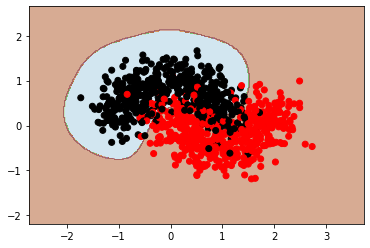

,Classifier,Range_lambda,Range_sigma,Best_lambda,Best_sigma,Error_train,Error_test
0,DiscriminantANoyau,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]","[0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]",7,0.5,0.094,0.098


In [ ]:
# Création du tableau pour accumuler les résultats
# Creation of the table to accumulate the results
results = {'Classifier':["DiscriminantANoyau"],
           'Range_lambda':[],
           'Range_sigma':[],
           'Best_lambda':[],
           'Best_sigma':[],
           'Error_train':[],
           'Error_test':[],
          }

# *** TODO ***
# Créez le jeu de données à partir de la fonction make_moons, tel que demandé dans l'énoncé
# N'oubliez pas de vous assurer que les valeurs possibles de y sont bel et bien dans -1 et 1, et non 0 et 1!
# Create the dataset from the make_moons function, as requested in the statement
# Remember to make sure that the possible values of y are in -1 and 1, not 0 and 1!
# ******
data = make_moons(n_samples=1000, noise=0.3)
X = data[0]
y = list(map(lambda x: 1 if x == 1 else -1,data[1]))

# *** TODO ***
# Séparez le jeu de données en deux parts égales, l'une pour l'entraînement et l'autre pour le test.
# Separate the dataset into two equal parts, one for training and one for testing.
# ******
XX_train, XX_test, yy_train, yy_test = train_test_split(X, y, test_size=0.5)
_times.append(time.time())

# *** TODO ***
# Indiquez la plage de recherche pour le
# paramètre Lambda en la mettant dans
# la liste de la variable range_lambda.
# Specify the search range for the
# parameter Lambda by putting it in
# the list of the variable range_lambda.
range_lambda = [n for n in range(0, 20)]


# ******

results['Range_lambda'].append(range_lambda)

# *** TODO ***
# Indiquez la plage de recherche pour le
# paramètre Sigma en la mettant dans
# la liste de la variable range_sigma.
# Specify the search range for the
# parameter Sigma by putting it in
# the list of the variable range_sigma.
range_sigma = [round(0.05*n, 2) for n in range(1, 20)]
# ******

results['Range_sigma'].append(range_sigma)

# *** TODO ***
# Optimisez ici les paramètres lambda et sigma de votre
# classifieur en effectuant une recherche en grille.
# Optimize here the lambda and sigma parameters of your
# classifier by performing a grid search.
# ******
score_max, opt_lambda, opt_sigma = 0, 0, 0
for lambda_ in range_lambda:
    for sigma_ in range_sigma:
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)
        clf = DiscriminantANoyau(lambda_, sigma_, verbose=False)
        clf.fit(X_train, y_train)

        scr = clf.score(X_test, y_test)
        if scr > score_max:
            opt_lambda, opt_sigma = lambda_, sigma_
            score_max = scr


# *** TODO ***
# Indiquez la valeur optimale pour le
# paramètre Lambda en la mettant dans la
# variable best_lambda en remplaçant le 0.
# Specify the optimal value for the
# parameter Lambda by putting it in the
# variable best_lambda by replacing the 0.
best_lambda = opt_lambda
# ******

results['Best_lambda'].append(best_lambda)

# *** TODO ***
# Indiquez la valeur optimale pour le
# paramètre Sigma en la mettant dans la
# variable best_sigma en remplaçant le 0.
# Specify the optimal value for the
# parameter Sigma by putting it in the
# variable best_sigma by replacing the 0.
best_sigma = opt_sigma
# ******

results['Best_sigma'].append(best_sigma)

# *** TODO ***
# Une fois les paramètres lambda et
# sigma de votre classifieur optimisés,
# créez une instance de ce classifieur
# en utilisant ces paramètres optimaux.
# Once the lambda and sigma parameters of your classifier are optimized,
# create an instance of this classifier
# using these optimal parameters.
# ******
opt_clf = DiscriminantANoyau(best_lambda, best_sigma, verbose=False)
opt_clf.fit(XX_train, yy_train)
# *** TODO ***
# Indicate the error rate obtained on the training set in the variable
# err_train variable by replacing the 0.
err_train = 1 - opt_clf.score(XX_train, yy_train)
# ******

results['Error_train'].append(err_train)

# *** TODO ***
# Indiquez le taux d'erreur obtenu sur le
# jeu de test dans la variable
# err_test en remplaçant le 0.
# Indicate the error rate obtained on the
# test set in the err_test variable by replacing the 0.
err_test = 1 - opt_clf.score(XX_test, yy_test)
# ******

results['Error_test'].append(err_test)

# *** TODO ***
# Créez ici une grille permettant d'afficher les régions de décision pour chaque classifieur
# Indice : numpy.meshgrid pourrait vous être utile ici
# Par la suite, affichez les régions de décision dans la même figure que les données de test.
# Note : un pas de 0.02 pour le meshgrid est recommandé
# ******
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = numpy.meshgrid(numpy.arange(x_min, x_max, h), numpy.arange(y_min, y_max, h))

pyplot.figure()

colors = numpy.array([x for x in "grcmyk"])

y_pred = opt_clf.predict(numpy.c_[xx.ravel(), yy.ravel()])

y_pred = y_pred.reshape(xx.shape)

pyplot.contourf(xx, yy, y_pred, cmap=pyplot.cm.Paired, alpha=0.5)
pyplot.scatter(X[:, 0], X[:, 1], cmap=pyplot.cm.Paired, c=colors[y])

pyplot.xlim(xx.min(), xx.max())
pyplot.ylim(yy.min(), yy.max())

# On affiche la figure
_times.append(time.time())
checkTime(TMAX_EVAL, "Evaluation")
pyplot.show()

# Affichage des résultats
df = pandas.DataFrame(results)
display.display(df)

### Patron de code réponse à l'exercice Q3C

### Q3C answer code template

In [ ]:
# Création du tableau pour accumuler les résultats
# Creation of the table to accumulate the results
results = {'Classifier':["DiscriminantANoyau"],
           'Range_lambda':[],
           'Range_sigma':[],
           'Best_lambda':[],
           'Best_sigma':[],
           'Error_train':[],
           'Error_test':[],
          }

# *** TODO ***
# Créez le jeu de données à partir de la fonction make_moons, tel que demandé dans l'énoncé
# N'oubliez pas de vous assurer que les valeurs possibles de y sont bel et bien dans -1 et 1, et non 0 et 1!
# Create the dataset from the make_moons function, as requested in the statement
# Remember to make sure that the possible values of y are in -1 and 1, not 0 and 1!
# ******

# *** TODO ***
# Séparez le jeu de données en deux parts égales, l'une pour l'entraînement et l'autre pour le test.
# Separate the dataset into two equal parts, one for training and one for testing.
# ******

_times.append(time.time())

# *** TODO ***
# Indiquez la plage de recherche pour le
# paramètre Lambda en la mettant dans
# la liste de la variable range_lambda.
# Specify the search range for the
# parameter Lambda by putting it in
# the list of the variable range_lambda.
range_lambda = []
# ******

results['Range_lambda'].append(range_lambda)

# *** TODO ***
# Indiquez la plage de recherche pour le
# paramètre Sigma en la mettant dans
# la liste de la variable range_sigma.
# Specify the search range for the
# parameter Sigma by putting it in
# the list of the variable range_sigma.
range_sigma = []
# ******

results['Range_sigma'].append(range_sigma)

# *** TODO ***
# Optimisez ici les paramètres lambda et sigma de votre
# classifieur en effectuant une recherche en grille.
# Optimize here the lambda and sigma parameters of your
# classifier by performing a grid search.
# ******

# *** TODO ***
# Indiquez la valeur optimale pour le
# paramètre Lambda en la mettant dans la
# variable best_lambda en remplaçant le 0.
# Specify the optimal value for the
# parameter Lambda by putting it in the
# variable best_lambda by replacing the 0.
best_lambda = 0
# ******

results['Best_lambda'].append(best_lambda)

# *** TODO ***
# Indiquez la valeur optimale pour le
# paramètre Sigma en la mettant dans la
# variable best_sigma en remplaçant le 0.
# Specify the optimal value for the
# parameter Sigma by putting it in the
# variable best_sigma by replacing the 0.
best_sigma = 0
# ******

results['Best_sigma'].append(best_sigma)

# *** TODO ***
# Une fois les paramètres lambda et
# sigma de votre classifieur optimisés,
# créez une instance de ce classifieur
# en utilisant ces paramètres optimaux.
# Once the lambda and sigma parameters of your classifier are optimized,
# create an instance of this classifier
# using these optimal parameters.
# ******

# *** TODO ***
# Indicate the error rate obtained on the training set in the variable
# err_train variable by replacing the 0.
err_train = 0
# ******

results['Error_train'].append(err_train)

# *** TODO ***
# Indiquez le taux d'erreur obtenu sur le
# jeu de test dans la variable
# err_test en remplaçant le 0.
# Indicate the error rate obtained on the
# test set in the err_test variable by replacing the 0.
err_test = 0
# ******

results['Error_test'].append(err_test)

# *** TODO ***
# Créez ici une grille permettant d'afficher les régions de décision pour chaque classifieur
# Indice : numpy.meshgrid pourrait vous être utile ici
# Par la suite, affichez les régions de décision dans la même figure que les données de test.
# Note : un pas de 0.02 pour le meshgrid est recommandé
# ******

# On affiche la figure
_times.append(time.time())
checkTime(TMAX_EVAL, "Evaluation")
pyplot.show()

# Affichage des résultats
df = pandas.DataFrame(results)
display.display(df)